In [1]:

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
'''

'\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n'

In [2]:
data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Dropped The Column Unnamed: 0**

In [5]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [6]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [8]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

**Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian)
Here I use Multinominal Bayes Because here data in a discrete form 
discrete data(e.g movie ratings ranging  1 to 5 as each rating will have certain frequency to represent)**

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

# Tarining The Model

In [11]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

**Here I given Two email Two detect 1st One is looking good and the other one looking spam**

In [12]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

**Predict Email**

In [15]:
print(clf.predict(emails))

[0 0]


# Prediction Of Model

In [14]:
clf.score(X_test,y_test)

0.9820531227566404

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

In [18]:
xgb_model = xgb.XGBClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()

In [25]:
xgb_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('xgb',xgb.XGBClassifier())
])

dt_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])

rf_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('rf',RandomForestClassifier())
])

lr_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('lr',LogisticRegression())
])

gb_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('gb',GradientBoostingClassifier())
])

ab_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('ab',AdaBoostClassifier())
])

svm_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('svm',SVC())
])

knn_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('knn',KNeighborsClassifier())
])

gnb_model=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('gnb',GaussianNB())
])

In [27]:
# Fitting the models
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
#gnb_model.fit(X_train, y_train)

c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier())])

In [28]:
# Making predictions
xgb_pred = xgb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ab_pred = ab_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
#gnb_pred = gnb_model.predict(X_test)

c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
# Evaluating the models
xgb_accuracy = accuracy_score(y_test, xgb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
#gnb_accuracy = accuracy_score(y_test, gnb_pred)

In [30]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
#print("GaussianNB Accuracy:", gnb_accuracy)

XGBoost Accuracy: 0.9791816223977028
Decision Tree Accuracy: 0.968413496051687
Random Forest Accuracy: 0.9741564967695621
Logistic Regression Accuracy: 0.9798994974874372
Gradient Boosting Accuracy: 0.9741564967695621
AdaBoost Accuracy: 0.9669777458722182
SVM Accuracy: 0.9777458722182341
KNN Accuracy: 0.9045226130653267


In [39]:
import pickle
# now you can save it to a file
with open('bestModel.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [31]:
import matplotlib.pyplot as plt

c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


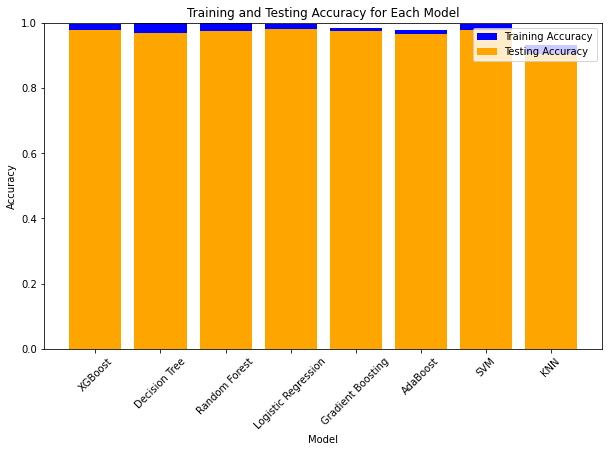

In [32]:
# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN']#, 'GaussianNB']
train_accuracies = [xgb_model.score(X_train, y_train), dt_model.score(X_train, y_train), rf_model.score(X_train, y_train), lr_model.score(X_train, y_train), gb_model.score(X_train, y_train), ab_model.score(X_train, y_train), svm_model.score(X_train, y_train), knn_model.score(X_train, y_train)]#, gnb_model.score(X_train, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy]#, gnb_accuracy]

# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='blue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [33]:
import matplotlib.pyplot as plt

# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN']#, 'GaussianNB']
train_accuracies = [xgb_model.score(X_train, y_train), dt_model.score(X_train, y_train), rf_model.score(X_train, y_train), lr_model.score(X_train, y_train), gb_model.score(X_train, y_train), ab_model.score(X_train, y_train), svm_model.score(X_train, y_train), knn_model.score(X_train, y_train)]#, gnb_model.score(X_train, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy]#, gnb_accuracy]

c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


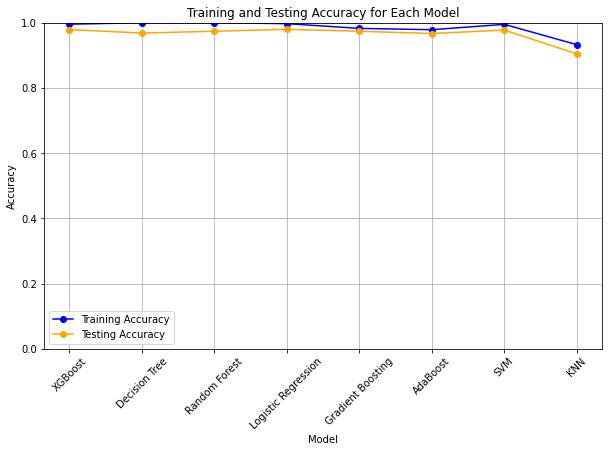

In [34]:
# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(models, test_accuracies, marker='o', linestyle='-', color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Stacking Classifier
estimators = [('xgb', xgb_model), ('dt', dt_model), ('rf', rf_model)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=lr_model)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print("Stacking Classifier Accuracy:", stacking_accuracy)

c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [36]:
# Voting Classifier
voting_model = VotingClassifier(estimators=estimators)
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
print("Voting Classifier Accuracy:", voting_accuracy)

c:\Users\Pallavi Wadkar\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Voting Classifier Accuracy: 0.9784637473079684


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

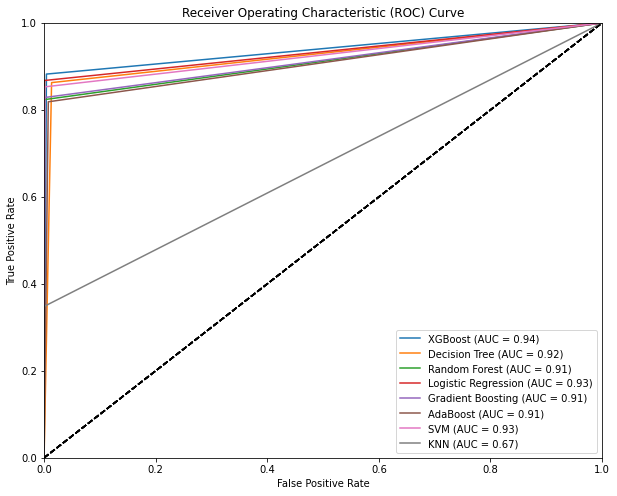

In [38]:
# Define a list of models and their corresponding predictions
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN']#, 'GaussianNB', 'Stacking Classifier', 'Voting Classifier']
predictions = [xgb_pred, dt_pred, rf_pred, lr_pred, gb_pred, ab_pred, svm_pred, knn_pred]#, gnb_pred, stacking_pred, voting_pred]

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model, prediction in zip(models, predictions):
    fpr, tpr, _ = roc_curve(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    plt.plot(fpr, tpr, label=model + ' (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Print confusion matrix report for each model
for model, prediction in zip(models, predictions):
    cm = confusion_matrix(y_test, prediction)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    print("Model:", model)
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("------------------------------")